# Preprocessing

In [1]:
import string
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from source import my_tokenizer

In [2]:
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package wordnet to /Users/edo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/edo/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
df = pd.read_csv("../data/clean_technology_reviews.csv", index_col=0)

In [5]:
df.head(5)

,overall,reviewText,asin,length
0,5.0,Looks even better in person. Be careful to not...,7508492919,271
1,5.0,When you don't want to spend a whole lot of ca...,7508492919,102
2,3.0,"so the case came on time, i love the design. I...",7508492919,257
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,7508492919,92
4,4.0,"I liked it because it was cute, but the studs ...",7508492919,150


In [6]:
pd.DataFrame(np.unique(df['overall'], return_counts=True)).T.set_index(0)

,1
0,
1.0,73423.0
2.0,51287.0
3.0,87526.0
4.0,156863.0
5.0,606482.0


In [7]:
rev_len = list()
for review in df["reviewText"]:
    rev_len.append(len(str(review)))

In [8]:
df["length"] = rev_len

In [9]:
df["length"].describe()

count    975581.000000
mean        210.164182
std         363.319956
min           1.000000
25%          35.000000
50%         110.000000
75%         241.000000
max       33457.000000
Name: length, dtype: float64

In [10]:
shorter = df[df["length"]<=500].copy()


In [11]:
shorter["reviewText"].fillna("", inplace=True)

In [12]:
shorter = shorter.reset_index(drop='index')

In [13]:
shorter["binary"]= np.where(shorter['overall']>3, 1, 0)

In [14]:
shorter.head(10)

,overall,reviewText,asin,length,binary
0,5.0,Looks even better in person. Be careful to not...,7508492919,271,1
1,5.0,When you don't want to spend a whole lot of ca...,7508492919,102,1
2,3.0,"so the case came on time, i love the design. I...",7508492919,257,0
3,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,7508492919,92,0
4,4.0,"I liked it because it was cute, but the studs ...",7508492919,150,1
5,2.0,The product looked exactly like the picture an...,7508492919,159,0
6,3.0,I FINALLY got my case today. It took forever t...,7508492919,344,0
7,5.0,It is a very cute case. None of the jewels hav...,7508492919,327,1
8,1.0,DO NOT BUY! this item is seriously cheap as he...,7508492919,190,0
9,4.0,I really love this case... you have to keep yo...,7508492919,188,1


In [15]:

X_1 = shorter["reviewText"].copy()
y_1= shorter["binary"]


X_rem, X_test, y_rem, y_test = train_test_split(X_1, y_1, test_size=0.2, stratify=y_1,random_state=42)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.2,stratify=y_rem, random_state=42)

In [17]:
tfidf = TfidfVectorizer(min_df=10,tokenizer = my_tokenizer, max_features=500)
tfidf.fit(X_train)
X_train_transformed = tfidf.transform(X_train)
X_val_transformed = tfidf.transform(X_val)

/Users/edo/anaconda3/envs/es_capstone/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()
).sort_values("counts", ascending=False)

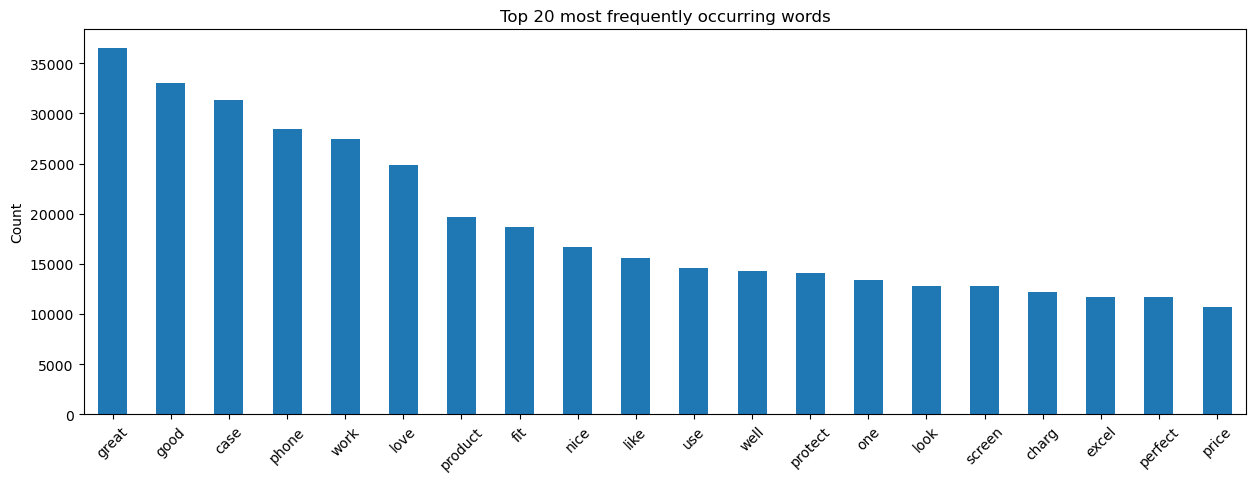

In [19]:
word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [20]:
word_counts

,counts
great,36532.618829
good,33056.486780
case,31376.819779
phone,28452.770958
work,27466.573571
...,...
posit,727.725014
point,726.933534
silicon,709.751623
micro,701.323046


In [21]:
feat = tfidf.get_feature_names_out()

In [22]:
english_words = set(nltk.corpus.words.words())

stemmed_english_list = []
for i in english_words:
    token = PorterStemmer().stem(i)
    stemmed_english_list.append(token)


In [23]:
unrecognized_tokens = [token for token in feat if token.lower() not in stemmed_english_list]
num_unrec = len(unrecognized_tokens)
num_unrec/len(feat)

0.048

In [24]:
'explained' in unrecognized_tokens

False

In [25]:
unrecognized_word_counts = word_counts[word_counts.index.isin(unrecognized_tokens)]
len(unrecognized_word_counts)


24

In [26]:
unrecognized_word_counts.sort_values(by = 'counts', ascending=False).head(30)

,counts
iphon,7544.340209
ive,4405.552476
im,4311.342858
samsung,3369.873156
otterbox,2403.699600
usb,2194.103107
okay,1531.481461
100,1473.381052
isnt,1437.849986
s5,1397.691039


In [27]:
"explains" in nltk.corpus.words.words()

False

In [28]:
unrecognized_word_counts.describe()

,counts
count,24.000000
mean,1876.759292
std,1576.181074
min,813.469020
25%,1041.068802
50%,1229.044468
75%,1697.136872
max,7544.340209


In [29]:
unrecognized_word_counts.quantile(0.99)

counts    6822.41903
Name: 0.99, dtype: float64

In [30]:
unrecognized_word_counts.head(10)

,counts
iphon,7544.340209
ive,4405.552476
im,4311.342858
samsung,3369.873156
otterbox,2403.699600
usb,2194.103107
okay,1531.481461
100,1473.381052
isnt,1437.849986
s5,1397.691039


In [31]:
review_vectors = tfidf.transform(shorter["reviewText"].fillna(''))


In [32]:
review_vectors_df = pd.DataFrame(review_vectors.toarray(), columns=tfidf.get_feature_names_out())


In [33]:
output_df = pd.concat([shorter, review_vectors_df], axis=1)

In [34]:
output_df.head(3)

,overall,reviewText,asin,length,binary,10,100,6s,abl,absolut,...,wont,work,worri,worth,would,wouldnt,wrong,year,yet,your
0,5.0,Looks even better in person. Be careful to not...,7508492919,271,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,5.0,When you don't want to spend a whole lot of ca...,7508492919,102,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,3.0,"so the case came on time, i love the design. I...",7508492919,257,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206461,0.0


In [41]:
output_df.to_pickle("../data/reviews_vector.pkl")